In [ ]:
# import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# access the label names from the meta file
with open('/content/meta','rb') as f:
    meta_data = pk.load(f,encoding='bytes')
    class_names_= meta_data[b'fine_label_names']

In [ ]:
len(class_names_)

100

In [ ]:
print(class_names_)

[b'apple', b'aquarium_fish', b'baby', b'bear', b'beaver', b'bed', b'bee', b'beetle', b'bicycle', b'bottle', b'bowl', b'boy', b'bridge', b'bus', b'butterfly', b'camel', b'can', b'castle', b'caterpillar', b'cattle', b'chair', b'chimpanzee', b'clock', b'cloud', b'cockroach', b'couch', b'crab', b'crocodile', b'cup', b'dinosaur', b'dolphin', b'elephant', b'flatfish', b'forest', b'fox', b'girl', b'hamster', b'house', b'kangaroo', b'keyboard', b'lamp', b'lawn_mower', b'leopard', b'lion', b'lizard', b'lobster', b'man', b'maple_tree', b'motorcycle', b'mountain', b'mouse', b'mushroom', b'oak_tree', b'orange', b'orchid', b'otter', b'palm_tree', b'pear', b'pickup_truck', b'pine_tree', b'plain', b'plate', b'poppy', b'porcupine', b'possum', b'rabbit', b'raccoon', b'ray', b'road', b'rocket', b'rose', b'sea', b'seal', b'shark', b'shrew', b'skunk', b'skyscraper', b'snail', b'snake', b'spider', b'squirrel', b'streetcar', b'sunflower', b'sweet_pepper', b'table', b'tank', b'telephone', b'television', b'ti

## Dataset Exploration


In [ ]:
# check the shape of the data
print(f'Training data shape: {x_train.shape}')
print(f'Training label data shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test label data shape: {y_test.shape}')

Training data shape: (50000, 32, 32, 3)
Training label data shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test label data shape: (10000, 1)


In [ ]:
# check the datatypes of the data
print(f'datatype of images: {x_train.dtype}')
print(f'datatype of labels: {y_train.dtype}')

datatype of images: uint8
datatype of labels: int64


In [ ]:
# visualize sampple images
def plot_sample_images(images,labels,class_names,n=10):
    plt.figure(figsize=(12,12))
    for i in range(25):
        plt.subplot(n,n,i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]],fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('sample images.png')
    plt.show()


In [ ]:
class_names = [name.decode('utf-8') for name in meta_data[b'fine_label_names']]

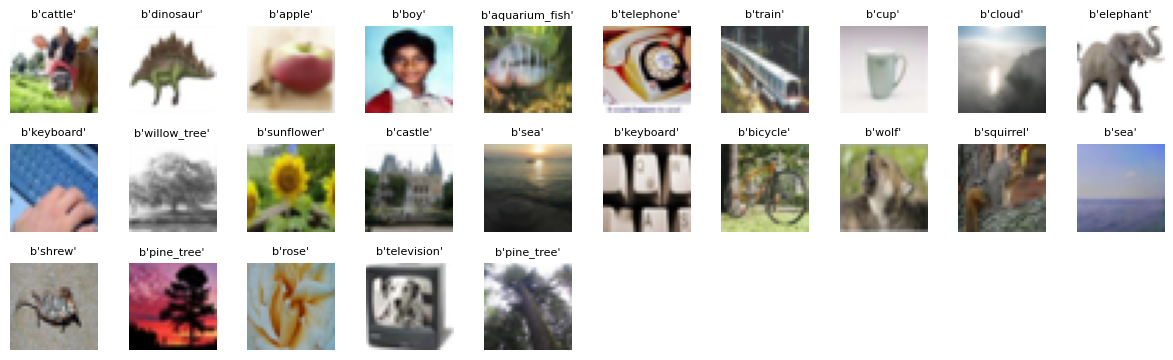

In [ ]:
plot_sample_images(x_train,y_train,class_names_)

## check for the class distribution

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
train_labels=y_train.flatten()
test_labels=y_test.flatten()

In [ ]:
# convert to dataframe for plotting
def dataset_distribution(dataset,name=''):
    labels_df = pd.DataFrame(dataset,columns=['Class'])
    labels_df["Class Name"] = labels_df["Class"].apply(lambda x: class_names_[x])
    # Plot class distribution
    plt.figure(figsize=(15, 5))
    sns.countplot(data=labels_df, x="Class Name", order=labels_df["Class Name"].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"Class Distribution in CIFAR-100 {name} Set")
    plt.savefig(f'{name}.png')
    plt.show()

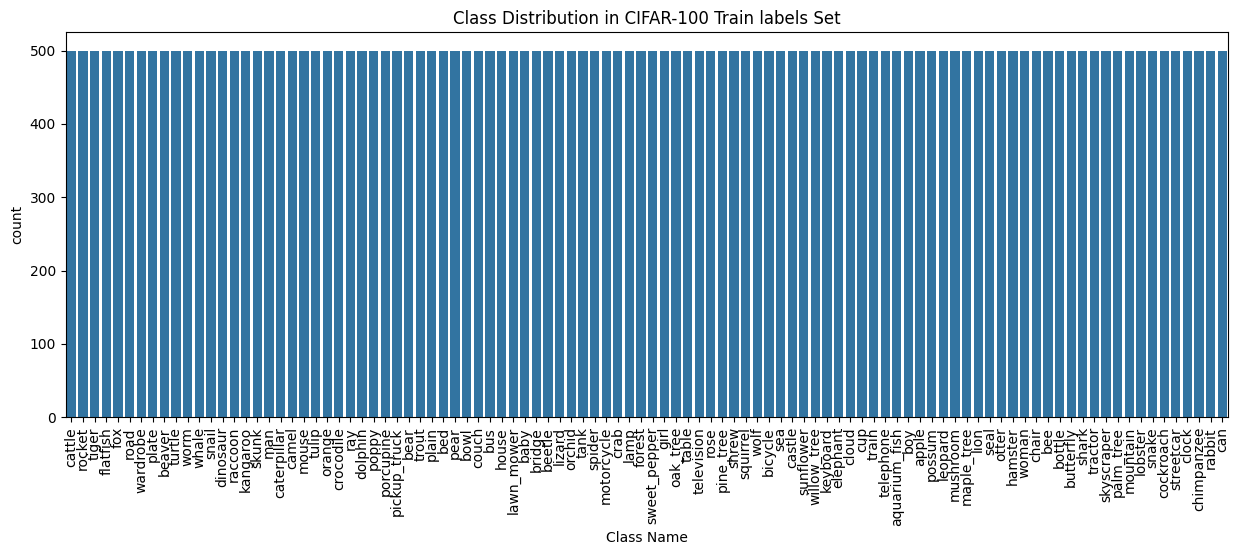

In [ ]:
dataset_distribution(train_labels,"Train labels")

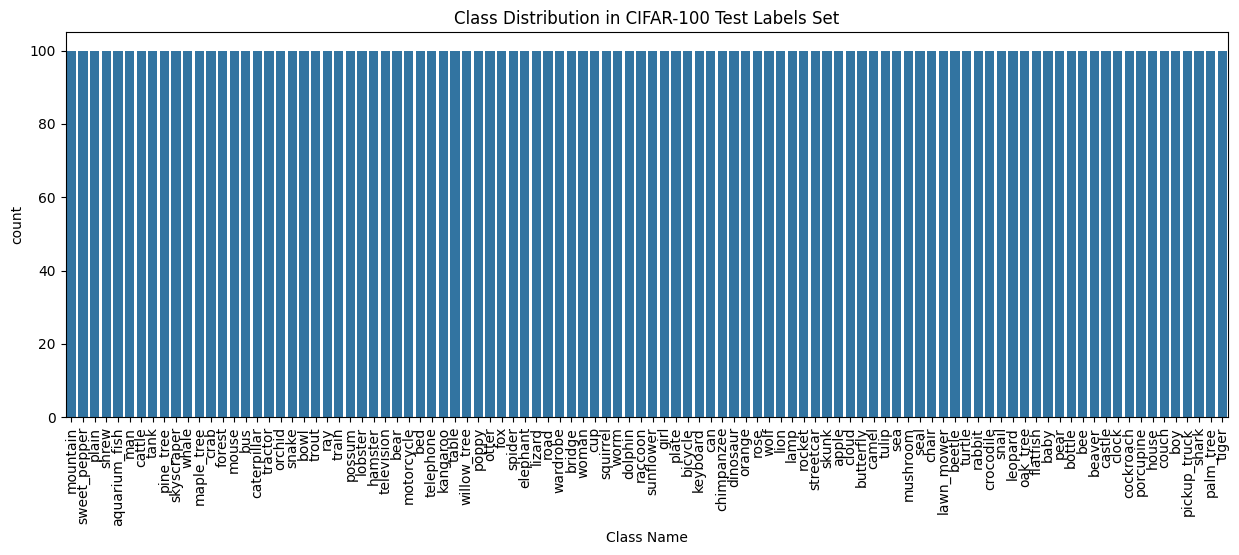

In [ ]:
dataset_distribution(test_labels,'Test Labels')

In [ ]:
# statistcal analysis of images
# Calculate pixel value statistics
mean_train = np.mean(x_train, axis=(0, 1, 2))
std_train = np.std(x_train, axis=(0, 1, 2))
mean_test = np.mean(x_test, axis=(0, 1, 2))
std_test = np.std(x_test, axis=(0, 1, 2))

print(f"Mean pixel values (train): {mean_train}")
print(f"Std deviation of pixel values (train): {std_train}")
print(f"Mean pixel values (test): {mean_test}")
print(f"Std deviation of pixel values (test): {std_test}")

Mean pixel values (train): [129.30416561 124.0699627  112.43405006]
Std deviation of pixel values (train): [68.1702429  65.39180804 70.41837019]
Mean pixel values (test): [129.74308525 124.28521836 112.69526387]
Std deviation of pixel values (test): [68.40415141 65.62775279 70.65942155]


In [ ]:
# verify the size of the images
unique_shapes= np.unique([img.shape for img in x_train],axis=0)
print(f"Unique image shapes in dataset: {unique_shapes}")

Unique image shapes in dataset: [[32 32  3]]


In [ ]:
# Analyze the distribution of the labels and verify that all 100 labels are represented
num_classes_train = len(np.unique(y_train))
num_classes_test = len(np.unique(y_test))

In [ ]:
print(f"Number of unique classes in training set: {num_classes_train}")
print(f"Number of unique classes in test set: {num_classes_test}")

Number of unique classes in training set: 100
Number of unique classes in test set: 100


In [ ]:
# inspect the color channels

for i, color in enumerate(['Red', 'Green', 'Blue']):
    print(f"{color} channel - mean: {mean_train[i]}, std: {std_train[i]}")

Red channel - mean: 129.30416560546874, std: 68.17024289920629
Green channel - mean: 124.0699626953125, std: 65.39180804385747
Blue channel - mean: 112.43405005859375, std: 70.41837018804976


# Image Data preprocessing

### normalize the images


In [ ]:
x_train,x_test = x_train/255.,x_test/255.

### Data Augumentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

In [ ]:
#apply data augumentation to each image
augmented_images=[]
augmented_labels=[]

number_augmented_per_images=5
for image,label in zip(x_train,y_train):
  for _ in range(number_augmented_per_images):
    # expand dimensions and apply augmentation
    augmented_image = data_augmentation(tf.expand_dims(image, axis=0))
    augmented_images.append(tf.squeeze(augmented_image).numpy())
    augmented_labels.append(label)

# convert to numpy array
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

Augmented Images Shape: (50000, 5, 32, 32, 3)
Augmented Labels Shape: (50000, 5)


In [ ]:
# To save the augmented images
def serialize_example(image,label):
  feature = {'image':tf.train.Feature(byte_list=tf.train.BytesList(value=[tf.io.encode_jpeg(tf.cast(image,tf.unit8)).numpy()])),
             'label':tf.train.Feature(int64_list=tf.train.Int64List(value=[label]))}
  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()

In [ ]:
TFRecordfile='augumented_cifar100.tfrecord'
with tf.io.TFRecordWriter(TFRecordfile) as writer:
  for img,lbl in zip(augmented_images,augmented_labels):
    example = serialize_example(img,lbl[0])
    writer.write(example)

AttributeError: module 'tensorflow' has no attribute 'unit8'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')